In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import networkx
from operator import itemgetter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx.generators.small
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [0]:
# Read the data from amazon-books.csv into amazonBooks dataframe;
amazonBooks = pd.read_csv('/gdrive/My Drive/CIS_509/Individual_Assignments/NetworkAnalysis/amazon-books.csv', index_col=0)

In [0]:
mms = MinMaxScaler()
rs= RobustScaler()
amazonBooks['SalesRank'] = rs.fit_transform(amazonBooks[['SalesRank']])
amazonBooks['TotalReviews']= mms.fit_transform(amazonBooks[['TotalReviews']])
amazonBooks['AvgRating'] = mms.fit_transform(amazonBooks[['AvgRating']])
amazonBooks['DegreeCentrality'] = mms.fit_transform(amazonBooks[['DegreeCentrality']])

In [0]:
display(amazonBooks)

,Id,Title,Categories,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff
0827229534,1,Patterns of Preaching: A Sermon Sampler,books christianity sermons clergy spirituality...,-0.108500,0.000361,1.0,0.024691,0.464286
0738700797,2,Candlemas: Feast of Flames,religions books spirituality subjects religion...,-0.458699,0.002164,0.9,0.027778,0.583333
0486287785,3,World War II Allied Fighter Planes Trading Cards,books subjects general garden hobbies home crafts,1.234100,0.000180,1.0,0.000000,0.000000
0842328327,4,Life Application Bible Commentary: 1 and 2 Tim...,bibles application testament sacred commentari...,0.252015,0.000180,0.8,0.018519,0.600000
1577943082,5,Prayers That Avail Much for Business: Executive,living books christianity business spiritualit...,-0.018526,0.000000,0.0,0.012346,1.000000
...,...,...,...,...,...,...,...,...
9700507734,548541,Para alcanzar el orgasmo,books body mind subjects general health,-0.717669,0.000180,0.8,0.000000,0.000000
9627762644,548542,Starting a Hedge Fund : A US Perspective,books business subjects general investing,-0.717669,0.000541,0.5,0.000000,0.000000
0970020503,548543,Facts Every Injured Worker Should Know,employment practical books business law guides...,-0.717669,0.000902,0.9,0.000000,0.000000
1930519206,548546,Adobe Photoshop 6 VTC Training CD,graphics development computers adobe com compu...,-0.717669,0.000361,1.0,0.000000,0.000000


In [5]:
fhr=open("/gdrive/My Drive/CIS_509/Individual_Assignments/NetworkAnalysis/amazon-books-copurchase.edgelist", 'rb')
copurchaseGraph=networkx.read_weighted_edgelist(fhr)
fhr.close()

print ("Looking for Recommendations for Customer Purchasing this Book:")
print ("--------------------------------------------------------------")
purchasedAsin = '0805047905'

# Let's first get some metadata associated with this book
print ("ASIN = ", purchasedAsin) 
print ("Title = ", amazonBooks.loc[purchasedAsin,'Title'])
print ("SalesRank = ", amazonBooks.loc[purchasedAsin,'SalesRank'])
print ("TotalReviews = ", amazonBooks.loc[purchasedAsin,'TotalReviews'])
print ("AvgRating = ", amazonBooks.loc[purchasedAsin,'AvgRating'])
print ("DegreeCentrality = ", amazonBooks.loc[purchasedAsin,'DegreeCentrality'])
print ("ClusteringCoeff = ", amazonBooks.loc[purchasedAsin,'ClusteringCoeff'])


Looking for Recommendations for Customer Purchasing this Book:
--------------------------------------------------------------
ASIN =  0805047905
Title =  Brown Bear, Brown Bear, What Do You See?
SalesRank =  171
TotalReviews =  172
AvgRating =  5.0
DegreeCentrality =  216
ClusteringCoeff =  0.01976744186046512


['0849959713', '1550742256', '0060255668', '0785753168', '1564029654', '0395287731', '0152004718', '0152002650', '1558580093', '0399208534', '0399237100', '0613033493', '0152018395', '0833539841', '0688045855', '0152009981', '0698116453', '0763615765', '0849976146', '0060235152', '0805023461', '1558585362', '0694006246', '1581170912', '0395557011', '0152021752', '0688149014', '0517800799', '0688085555', '1581170769', '0152567089', '0375425675', '0152010661', '0688109942', '0694003611', '0689835604', '0694006513', '0061074292', '076360013X', '0064431592', '0152026320', '0763615757', '0689504764', '0698114280', '0064430685', '0316032271', '1931615020', '0399207589', '0590413872', '0152166084', '0898457475', '0399227741', '0843143967', '0618051589', '0763603538', '0399216596', '0671748947', '0689847580', '1929132387', '0898459958', '0899197019', '0152380116', '0613284437', '0689809999', '0763606758', '0694013013', '088708026X', '0152560262', '068811718X', '0399234276', '030716327X', '0152

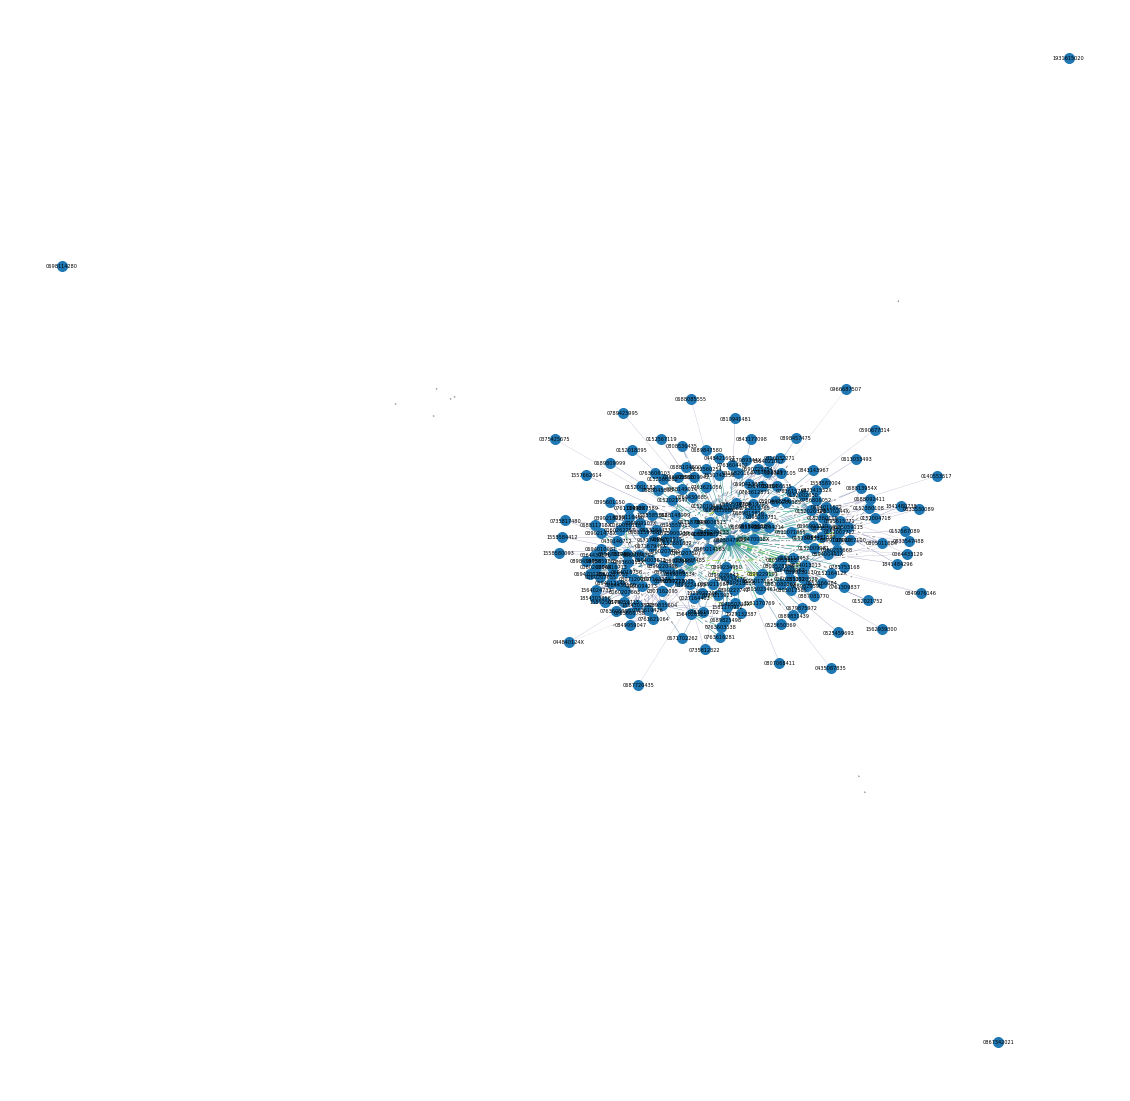

In [10]:
# Now let's look at the ego network associated with purchasedAsin in the
# copurchaseGraph - which is esentially comprised of all the books 
# that have been copurchased with this book in the past
# (1) YOUR CODE HERE: 
#     Get the depth-1 ego network of purchasedAsin from copurchaseGraph,
#     and assign the resulting graph to purchasedAsinEgoGraph.

purchasedAsinEgoGraph=networkx.Graph()
purchasedAsinEgoGraph = networkx.ego_graph(copurchaseGraph,purchasedAsin,radius=1)
purchasedAsinEgoGraph_neighbors = [ i for i in purchasedAsinEgoGraph.neighbors(purchasedAsin)]
print(purchasedAsinEgoGraph_neighbors)
print(len(purchasedAsinEgoGraph))


# plot the weighted graph
pos=networkx.spring_layout(purchasedAsinEgoGraph)
plt.figure(figsize=(20,20))
networkx.draw_networkx_nodes(purchasedAsinEgoGraph,pos,node_size=100)
networkx.draw_networkx_labels(purchasedAsinEgoGraph,pos,font_size=5)
edgewidth = [d['weight'] for (u,v,d) in purchasedAsinEgoGraph.edges(data=True)]
networkx.draw_networkx_edges(purchasedAsinEgoGraph,pos,edge_color=edgewidth,width=edgewidth)
edgelabel = networkx.get_edge_attributes(purchasedAsinEgoGraph,'weight')
networkx.draw_networkx_edge_labels(purchasedAsinEgoGraph,pos,edge_labels=edgelabel,font_size=2)
plt.axis('off')
#plt.savefig("graph.png") 
plt.show()

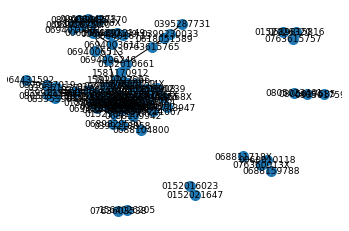

In [0]:

# Next, recall that the edge weights in the copurchaseGraph is a measure of
# the similarity between the books connected by the edge. So we can use the 
# island method to only retain those books that are highly simialr to the 
# purchasedAsin
# (2) YOUR CODE HERE: 
#     Use the island method on purchasedAsinEgoGraph to only retain edges with 
#     threshold >= 0.5, and assign resulting graph to purchasedAsinEgoTrimGraph
threshold = 0.5
purchasedAsinEgoTrimGraph = networkx.Graph()

for from_node,to_node,edge in purchasedAsinEgoGraph.edges(data=True):
  if edge['weight'] >= threshold:
    purchasedAsinEgoTrimGraph.add_edge(from_node,to_node,weight = edge['weight'])

pos=networkx.spring_layout(purchasedAsinEgoTrimGraph)
networkx.draw_networkx_nodes(purchasedAsinEgoTrimGraph,pos, node_size = 100)
networkx.draw_networkx_labels(purchasedAsinEgoTrimGraph,pos, font_size=9)
networkx.draw_networkx_edges(purchasedAsinEgoTrimGraph,pos)
plt.axis('off')
#plt.savefig("graph.png") 
plt.show() 

In [0]:
# Next, recall that given the purchasedAsinEgoTrimGraph you constructed above, 
# you can get at the list of nodes connected to the purchasedAsin by a single 
# hop (called the neighbors of the purchasedAsin) 
# (3) YOUR CODE HERE: 
#     Find the list of neighbors of the purchasedAsin in the 
#     purchasedAsinEgoTrimGraph, and assign it to purchasedAsinNeighbors
purchasedAsinNeighbors = [i for i in purchasedAsinEgoTrimGraph.neighbors(purchasedAsin)]
print(purchasedAsinNeighbors)
print(len(purchasedAsinNeighbors))

['0688045855', '0399208534', '0694011622', '0688109942', '0152009981', '0399226907', '0399226842', '0694006246', '0399216596', '0688148999', '0399213015', '0399229191', '067167949X', '0694013013', '015216412X', '0152166084', '0613228529', '1929927266', '078570244X', '0805053883', '0399230130', '0152380116', '0399234276', '0152010661', '0786806052', '0808528858', '1581170769', '088708026X', '0064435962', '0399237720', '0698116453', '0786803908', '0688149014', '0399234950', '0152002650', '0060235152', '0395900220', '0152005331', '067187893X', '0152007717', '0399220496']
41


In [0]:
# Next, let's pick the Top Five book recommendations from among the 
# purchasedAsinNeighbors based on one or more of the following data of the 
# neighboring nodes: SalesRank, AvgRating, TotalReviews, DegreeCentrality, 
# and ClusteringCoeff
# (4) YOUR CODE HERE: 
#     Note that, given an asin, you can get at the metadata associated with  
#     it using amazonBooks (similar to lines 29-36 above).
#     Now, come up with a composite measure to make Top Five book 
#     recommendations based on one or more of the following metrics associated 
#     with nodes in purchasedAsinNeighbors: SalesRank, AvgRating, 
#     TotalReviews, DegreeCentrality, and ClusteringCoeff. Feel free to compute
#     and include other measures if you like.
#     YOU MUST come up with a composite measure.
#     DO NOT simply make recommendations based on sorting!!!
#     Also, remember to transform the data appropriately using 
#     sklearn preprocessing so the composite measure isn't overwhelmed 
#     by measures which are on a higher scale.


def composite_measure(neighbors,df,asin,trimgraph):
    total_reviews = np.sum(df.loc[neighbors]['TotalReviews'])
    total_similarity = np.sum([d['weight'] for (u,v,d) in trimgraph.edges(data=True)])
    total_rating = np.sum(df.loc[neighbors]['AvgRating'])
    total=np.sum(df.loc[neighbors]['DegreeCentrality'])
    print(total)
    total_centrality = pow(pow(np.sum(df.loc[neighbors]['DegreeCentrality']),2),1/2)
    print(total_centrality)
    list_score=[]
    for i in neighbors:
        list_score.append(((trimgraph.get_edge_data(asin,i)['weight'] *df.loc[i,'SalesRank']* df.loc[i,'TotalReviews'] *df.loc[i,'AvgRating'] *df.loc[i,'DegreeCentrality']) / (total_similarity*total_centrality* total_reviews*total_rating),i))
    return list_score


In [0]:
final_recommendations = sorted(composite_measure(purchasedAsinNeighbors, amazonBooks,purchasedAsin,purchasedAsinEgoTrimGraph),reverse=True)[:5]
print(final_recommendations)

1.9814814814814816
1.9814814814814816
[(8.440095949703776e-09, '0152005331'), (9.243817639582241e-10, '0786803908'), (8.15179326389685e-10, '0808528858'), (5.627067984774785e-10, '1929927266'), (4.739679534493341e-10, '0688045855')]


In [0]:
# Read the data from amazon-books.csv into amazonBooks dataframe;
amazonBooks_recomm = pd.read_csv('/gdrive/My Drive/CIS_509/Individual_Assignments/NetworkAnalysis/amazon-books.csv', index_col=0)

In [0]:
print('FINAL RECOMMENDATIONS OF BOOKS BASED ON THE PURCHASE')

print ("----------------------------------------------------")

final = [fin[1] for fin in final_recommendations] 
for i in final:
    print()
    print("Here are the book details:")
    print()
  
    recommend_id = i

  # Let's first get some metadata associated with this book
    print ("ASIN = ", recommend_id) 
    print ("Title = ", amazonBooks_recomm.loc[recommend_id,'Title'])
    print ("SalesRank = ", amazonBooks_recomm.loc[recommend_id,'SalesRank'])
    print ("TotalReviews = ", amazonBooks_recomm.loc[recommend_id,'TotalReviews'])
    print ("AvgRating = ", amazonBooks_recomm.loc[recommend_id,'AvgRating'])
    print ("DegreeCentrality = ", amazonBooks_recomm.loc[recommend_id,'DegreeCentrality'])
    print ("ClusteringCoeff = ", amazonBooks_recomm.loc[recommend_id,'ClusteringCoeff'])



FINAL RECOMMENDATIONS OF BOOKS BASED ON THE PURCHASE
----------------------------------------------------

Here are the book details:

ASIN =  0399226907
Title =  The Very Hungry Caterpillar board book
SalesRank =  279
TotalReviews =  164
AvgRating =  4.5
DegreeCentrality =  116
ClusteringCoeff =  0.038680659670164916

Here are the book details:

ASIN =  0152010661
Title =  Time for Bed
SalesRank =  3122
TotalReviews =  87
AvgRating =  5.0
DegreeCentrality =  60
ClusteringCoeff =  0.032203389830508466

Here are the book details:

ASIN =  0805053883
Title =  Polar Bear, Polar Bear, What Do You Hear?
SalesRank =  2515
TotalReviews =  29
AvgRating =  4.5
DegreeCentrality =  42
ClusteringCoeff =  0.07084785133565621

Here are the book details:

ASIN =  0399229191
Title =  The Very Busy Spider (Board Book)
SalesRank =  2558
TotalReviews =  27
AvgRating =  4.5
DegreeCentrality =  49
ClusteringCoeff =  0.09608843537414967

Here are the book details:

ASIN =  0694013013
Title =  From Head to T

In [0]:
# -*- coding: utf-8 -*-
"""
@author: hina
"""
print ()

# Read the data from amazon-books.csv into amazonBooks dataframe;
amazonBooks = pd.read_csv('/gdrive/My Drive/CIS_509/Individual_Assignments/NetworkAnalysis/amazon-books.csv', index_col=0)

# Read the data from amazon-books-copurchase.adjlist;
# assign it to copurchaseGraph weighted Graph;
# node = ASIN, edge= copurchase, edge weight = category similarity
fhr=open("/gdrive/My Drive/CIS_509/Individual_Assignments/NetworkAnalysis/amazon-books-copurchase.edgelist", 'rb')
copurchaseGraph=networkx.read_weighted_edgelist(fhr)
fhr.close()

# Now let's assume a person is considering buying the following book;
# what else can we recommend to them based on copurchase behavior 
# we've seen from other users?
print ("Looking for Recommendations for Customer Purchasing this Book:")
print ("--------------------------------------------------------------")
purchasedAsin = '0805047905'

# Let's first get some metadata associated with this book
print ("ASIN = ", purchasedAsin) 
print ("Title = ", amazonBooks.loc[purchasedAsin,'Title'])
print ("SalesRank = ", amazonBooks.loc[purchasedAsin,'SalesRank'])
print ("TotalReviews = ", amazonBooks.loc[purchasedAsin,'TotalReviews'])
print ("AvgRating = ", amazonBooks.loc[purchasedAsin,'AvgRating'])
print ("DegreeCentrality = ", amazonBooks.loc[purchasedAsin,'DegreeCentrality'])
print ("ClusteringCoeff = ", amazonBooks.loc[purchasedAsin,'ClusteringCoeff'])
    

# Now let's look at the ego network associated with purchasedAsin in the
# copurchaseGraph - which is esentially comprised of all the books 
# that have been copurchased with this book in the past
# (1) YOUR CODE HERE: 
#     Get the depth-1 ego network of purchasedAsin from copurchaseGraph,
#     and assign the resulting graph to purchasedAsinEgoGraph.
purchasedAsinEgoGraph = networkx.Graph()


# Next, recall that the edge weights in the copurchaseGraph is a measure of
# the similarity between the books connected by the edge. So we can use the 
# island method to only retain those books that are highly simialr to the 
# purchasedAsin
# (2) YOUR CODE HERE: 
#     Use the island method on purchasedAsinEgoGraph to only retain edges with 
#     threshold >= 0.5, and assign resulting graph to purchasedAsinEgoTrimGraph
threshold = 0.5
purchasedAsinEgoTrimGraph = networkx.Graph()


# Next, recall that given the purchasedAsinEgoTrimGraph you constructed above, 
# you can get at the list of nodes connected to the purchasedAsin by a single 
# hop (called the neighbors of the purchasedAsin) 
# (3) YOUR CODE HERE: 
#     Find the list of neighbors of the purchasedAsin in the 
#     purchasedAsinEgoTrimGraph, and assign it to purchasedAsinNeighbors
purchasedAsinNeighbors = []

# Next, let's pick the Top Five book recommendations from among the 
# purchasedAsinNeighbors based on one or more of the following data of the 
# neighboring nodes: SalesRank, AvgRating, TotalReviews, DegreeCentrality, 
# and ClusteringCoeff
# (4) YOUR CODE HERE: 
#     Note that, given an asin, you can get at the metadata associated with  
#     it using amazonBooks (similar to lines 29-36 above).
#     Now, come up with a composite measure to make Top Five book 
#     recommendations based on one or more of the following metrics associated 
#     with nodes in purchasedAsinNeighbors: SalesRank, AvgRating, 
#     TotalReviews, DegreeCentrality, and ClusteringCoeff. Feel free to compute
#     and include other measures if you like.
#     YOU MUST come up with a composite measure.
#     DO NOT simply make recommendations based on sorting!!!
#     Also, remember to transform the data appropriately using 
#     sklearn preprocessing so the composite measure isn't overwhelmed 
#     by measures which are on a higher scale.


# Print Top 5 recommendations (ASIN, and associated Title, Sales Rank, 
# TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff)
# (5) YOUR CODE HERE:  

